# Health Accelerometer Project

In [1]:
#run Jupyter with this command via your cmd - 'jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000' in order to process big amount of data
#EDA
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(os.getcwd())

C:\Users\Maksym_Parats\PycharmProjects\DataScience


In [3]:
os.chdir(r'C:\Users\Maksym_Parats\Desktop\test\data\Activity Recognition from Single Chest-Mounted Accelerometer')

In [4]:
dir_list = os.listdir()
print(dir_list)

['.DS_Store', '1.csv', '10.csv', '11.csv', '12.csv', '13.csv', '14.csv', '15.csv', '2.csv', '3.csv', '4.csv', '5.csv', '6.csv', '7.csv', '8.csv', '9.csv', 'clusters.csv', 'example.csv', 'example.xlsx', 'ex_1_7.csv', 'frames.csv', 'HAR', 'README', 'samsung trial.ipynb']


In [5]:
# create new list of 15 data sets
list_files = [i for i in dir_list if i[0].isdigit()]
trans_list = sorted([int(i.split('.')[0]) for i in list_files])
new_list = [str(i) + '.csv' for i in trans_list]
print(new_list)

['1.csv', '2.csv', '3.csv', '4.csv', '5.csv', '6.csv', '7.csv', '8.csv', '9.csv', '10.csv', '11.csv', '12.csv', '13.csv', '14.csv', '15.csv']


In [6]:
#Preparing data sets and visualizing all 15 data sets per activity
dict_files = {}
column_names = ['number', 'x', 'y','z','activity']
for name in new_list:
    df = pd.read_csv(name, names = column_names, low_memory=False)
    dict_files[name] = df
print(dict_files['1.csv'])

          number     x     y     z  activity
0            0.0  1502  2215  2153         1
1            1.0  1667  2072  2047         1
2            2.0  1611  1957  1906         1
3            3.0  1601  1939  1831         1
4            4.0  1643  1965  1879         1
5            5.0  1604  1959  1921         1
6            6.0  1640  1829  1940         1
7            7.0  1607  1910  1910         1
8            8.0  1546  2045  1910         1
9            9.0  1529  2049  1972         1
10          10.0  1637  1978  1945         1
11          11.0  1596  2046  1866         1
12          12.0  1590  2006  1978         1
13          13.0  1601  1966  1957         1
14          14.0  1542  2003  1959         1
15          15.0  1598  2027  1941         1
16          16.0  1511  2258  1983         1
17          17.0  1555  1980  2023         1
18          18.0  1508  2468  1934         1
19          19.0  1580  1697  2005         1
20          20.0  1627  2073  1992         1
21        

file # 1.csv


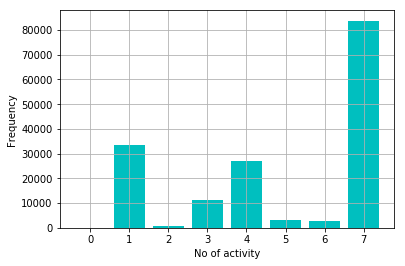

file # 2.csv


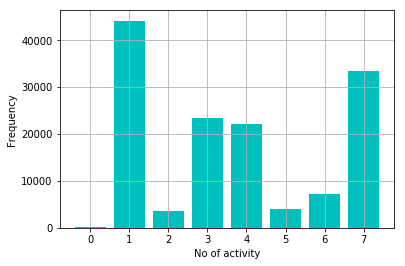

file # 3.csv


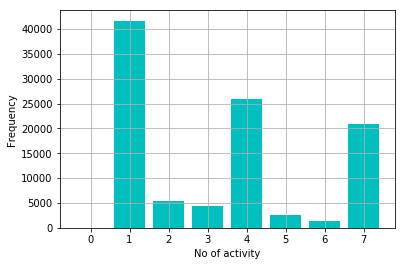

file # 4.csv


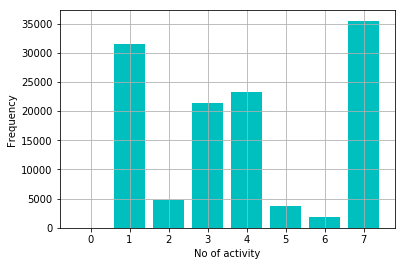

file # 5.csv


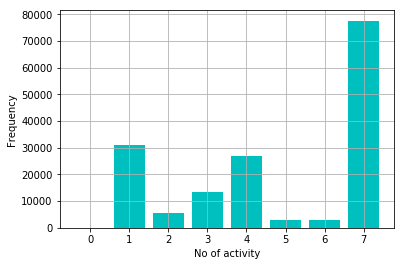

file # 6.csv


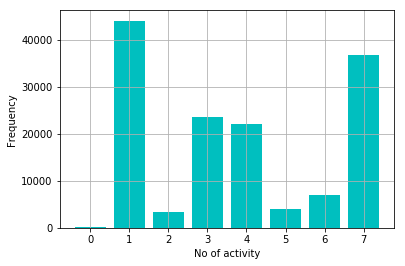

file # 7.csv


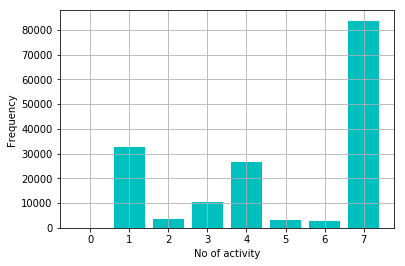

file # 8.csv


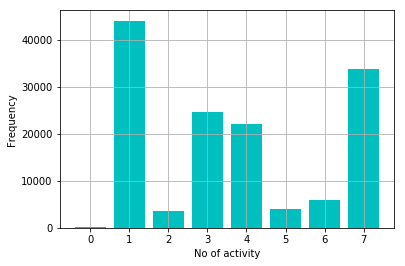

file # 9.csv


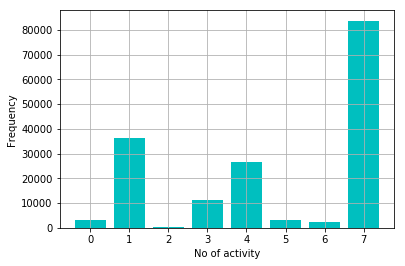

file # 10.csv


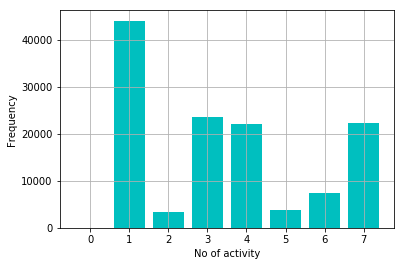

file # 11.csv


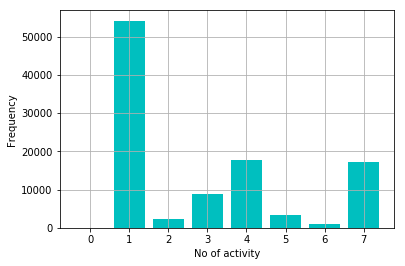

file # 12.csv


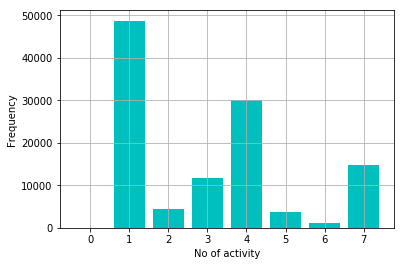

file # 13.csv


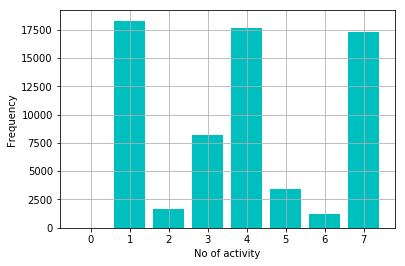

file # 14.csv


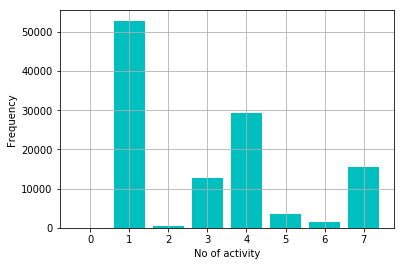

file # 15.csv


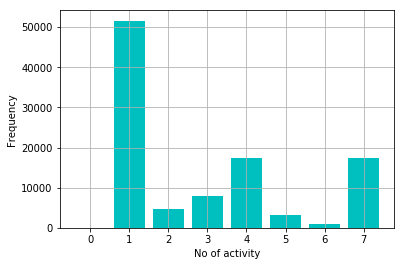

In [7]:
#Visualisation
for file, data in dict_files.items():
    print("file #", file)
    activity_group = data.groupby('activity').size()
    plt.bar(activity_group.index, activity_group.values,color='c')
    plt.ylabel('Frequency')
    plt.xlabel('No of activity')
    plt.grid(True)
    plt.show()

We can make assumption based on the visual results that there is one additional activity label - 0 within all data sets. This '0' label is not recognized as official and it has a small frequency. That's why it should be dropped. There are different frequencies of activities as well but we try to test our models based on this data without any transformation.

In [8]:
#Data preparation
all = []
labels = list(range(1,len(list_files)+1))   # [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
print(labels)
for index, item in enumerate(list_files):
    file_table = pd.read_csv(item, names = ['number', 'x', 'y','z','activity'], low_memory=False)
    sLength = file_table.shape[0]
    df = file_table.assign(label = pd.Series([labels[index]]*sLength))
    df_clear = df[df.activity != 0]
    all.append(df_clear)
print(all)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[          number     x     y     z  activity  label
0            0.0  1502  2215  2153         1      1
1            1.0  1667  2072  2047         1      1
2            2.0  1611  1957  1906         1      1
3            3.0  1601  1939  1831         1      1
4            4.0  1643  1965  1879         1      1
5            5.0  1604  1959  1921         1      1
6            6.0  1640  1829  1940         1      1
7            7.0  1607  1910  1910         1      1
8            8.0  1546  2045  1910         1      1
9            9.0  1529  2049  1972         1      1
10          10.0  1637  1978  1945         1      1
11          11.0  1596  2046  1866         1      1
12          12.0  1590  2006  1978         1      1
13          13.0  1601  1966  1957         1      1
14          14.0  1542  2003  1959         1      1
15          15.0  1598  2027  1941         1      1
16          16.0  1511  2258  1983         1      1
17         

In [9]:
# create new csv file with all cleared 15 sets
df_res = pd.concat(all)
df_res.to_csv('frames.csv', index=None)
data = pd.read_csv('frames.csv', low_memory=False)

In [10]:
data.head()

number     x     y     z  activity  label
0     0.0  1502  2215  2153         1      1
1     1.0  1667  2072  2047         1      1
2     2.0  1611  1957  1906         1      1
3     3.0  1601  1939  1831         1      1
4     4.0  1643  1965  1879         1      1

In [11]:
data.tail()

number     x     y     z  activity  label
1923172  166740.0  2071  2549  2053         7     15
1923173  166740.0  2072  2545  2059         7     15
1923174  166740.0  2069  2547  2064         7     15
1923175  166740.0  2069  2542  2062         7     15
1923176  166740.0  2069  2543  2063         7     15

In [12]:
data.describe()

number             x             y             z      activity  \
count  1.923177e+06  1.923177e+06  1.923177e+06  1.923177e+06  1.923177e+06   
mean   6.715608e+04  1.987479e+03  2.382300e+03  1.970488e+03  3.890407e+00   
std    4.148245e+04  1.113408e+02  1.002107e+02  9.449121e+01  2.439785e+00   
min    0.000000e+00  2.820000e+02  2.000000e+00  1.000000e+00  1.000000e+00   
25%    3.205200e+04  1.904000e+03  2.337000e+03  1.918000e+03  1.000000e+00   
50%    6.433400e+04  1.992000e+03  2.367000e+03  1.988000e+03  4.000000e+00   
75%    9.844000e+04  2.076000e+03  2.412000e+03  2.032000e+03  7.000000e+00   
max    1.667400e+05  3.828000e+03  4.095000e+03  4.095000e+03  7.000000e+00   

              label  
count  1.923177e+06  
mean   8.394850e+00  
std    4.514254e+00  
min    1.000000e+00  
25%    4.000000e+00  
50%    9.000000e+00  
75%    1.200000e+01  
max    1.500000e+01

# 1. Unsuppervised models

In [13]:
#OneClassSVM
#Let's train model on 1 label (testee) and tests it on 7
#Grab train and test frames for trainees 1 and 7 only
from sklearn.preprocessing import StandardScaler
import random
df_train = data[data['label'] == 1]
df_test = data[data['label'] == 7]

train_data = df_train[['x','y','z']]
test_data = df_test[['x','y','z']]

scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.fit_transform(test_data)

print('Length of trained scaled data {}'.format(len(train_data_scaled)))
print('Length of test scaled data {}'.format(len(test_data_scaled)))

#let's train our model on the 50000 samples and test it on 10000
train_split = random.choices(train_data_scaled, k =50000)
test_split = random.choices(test_data_scaled, k =10000)

print('Length of trained split data {}'.format(len(train_split)))
print('Length of test split data {}'.format(len(test_split)))

Length of trained scaled data 162500
Length of test scaled data 103500
Length of trained split data 50000
Length of test split data 10000


In [14]:
#OneClassSVM
from sklearn import svm
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(train_split)

pred_test = clf.predict(test_split)
n_error_test = pred_test[pred_test == -1].size
print ("Error rate on trainee 7 is {}".format(n_error_test/len(pred_test)))

Error rate on trainee 7 is 0.2234


In [15]:
#Now we need to train our set on testee no 1 and test it on 15 scaled data sets
#create additional 3 labels (with scaled x,y,z values)

data_scaled = scaler.fit_transform(data[['x','y','z']])
data['x-scaled'] = data_scaled[:,0]
data['y-scaled'] = data_scaled[:,1]
data['z-scaled'] = data_scaled[:,2]

In [16]:
# create train set by random choice (k = 50000)
df_train = data[data['label'] == 1].loc[:,'x-scaled':'z-scaled'].values
train_split = random.choices(df_train, k = 50000)
#create the dictionary with test data through cycle is impossible due to the 
test_dict = {}
for i in range(1,16):
    df_test = random.choices(data[data['label'] == i][['x-scaled','y-scaled','z-scaled']].values, k = 10000)
    test_dict[i] = df_test
print (test_dict)    


{1: [array([-0.15698539, -0.07284262,  1.47645113]), array([-0.6958715 ,  0.00698917,  0.10066139]), array([-1.06411034, -0.01296877,  0.38640233]), array([-0.77670442, -0.02294775,  0.16415937]), array([-0.56114997,  0.05688405,  1.01079921]), array([-1.09105465, -0.29238006,  0.69330927]), array([-0.6689272 , -0.76139186,  0.43931732]), array([-1.03716603, -0.01296877,  0.24882336]), array([-0.86651877,  0.02694712,  0.17474237]), array([-0.19291113, -0.09280057,  1.69869409]), array([-0.71383437, -0.62168622,  0.94730123]), array([-0.70485294,  0.076842  ,  0.22765736]), array([-0.6958715 , -1.13061391,  1.1060462 ]), array([-0.73179724, -0.02294775, -0.03691759]), array([-0.95633312, -0.01296877,  0.38640233]), array([-0.58809428,  0.04690507,  0.67214328]), array([-1.03716603,  0.0369261 ,  0.19590837]), array([-0.28272549, -0.01296877,  1.46586813]), array([-0.88448164,  0.53587482,  0.75680726]), array([-0.71383437, -0.20256929,  1.45528513]), array([-0.88448164,  0.23650559, -0

In [18]:
# Run OneClassSVM per each testee
from time import time
t0 = time()
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(df_train)
for key, value in test_dict.items():
    pred = clf.predict(value)
    n_error_test = pred[pred == -1].size
    print ("The {} testee has error rate {}".format(key, n_error_test/len(pred) * 100))
print ("time on training and prediction:", round(time()-t0, 3), "s")    

The 1 testee has error rate 9.76
The 2 testee has error rate 99.95
The 3 testee has error rate 61.27
The 4 testee has error rate 61.29
The 5 testee has error rate 82.39
The 6 testee has error rate 35.4
The 7 testee has error rate 99.8
The 8 testee has error rate 99.71
The 9 testee has error rate 92.58999999999999
The 10 testee has error rate 90.9
The 11 testee has error rate 57.43000000000001
The 12 testee has error rate 98.85000000000001
The 13 testee has error rate 99.96000000000001
The 14 testee has error rate 88.77000000000001
The 15 testee has error rate 99.88
time on training and prediction: 166.506 s


## The first testee (we trained our model based on his data) has the minimal error rate among all others testees. 

# 2. Suppervised models


In [17]:
#features and labels extraction from scaled data
features = data[['x-scaled','y-scaled','z-scaled']]
labels = data['label']

In [18]:
print (len(features))
print (len(labels))

1923177
1923177


In [19]:
# cross-validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)
print ('The length of training data is {}'.format(len(X_train)))
print ('The length of testing data is {}'.format(len(X_test)))

The length of training data is 1288528
The length of testing data is 634649


In [20]:
# scoring function printing model's accuracy
from sklearn.metrics import accuracy_score
def scoring(X,pred):
    result = 'Accuracy score is {0:.2f}%'.format(accuracy_score(X, pred)*100) 
    return result

In [21]:
#NAIVE
from time import time
from sklearn.naive_bayes import GaussianNB
t0 = time()
clf = GaussianNB()
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)
print ("time on training and prediction:", round(time()-t0, 3), "s")  
print (scoring(prediction, y_test))


time on training and prediction: 0.918 s
Accuracy score is 49.82%


In [22]:
#SVM (train only on 30000 samples)
from sklearn.svm import SVC
t0 = time()
clf = SVC()
clf.fit(X_train[:30000],y_train[:30000])
prediction = clf.predict(X_test[:10000])
print ("time on training and prediction:", round(time()-t0, 3), "s")  
print (scoring(prediction, y_test[:10000]))

time on training and prediction: 11.419 s
Accuracy score is 72.16%


In [23]:
# parameter selection (only on 1000 samples-insufficient of computer hardware)
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100, 1000, 10000], 'gamma': [0.1, 0.01, 0.001, 0.0001, 0.00001]}
t0 = time()
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameters, n_jobs=-1)
clf.fit(X_train[:1000],y_train[:1000]) 
print ("time on parameters selection:", round(time()-t0, 3), "s")  
print('Best score for data1:', clf.best_score_) 
print('Best C:',clf.best_estimator_.C) 
print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf.best_estimator_.gamma)

time on parameters selection: 36.301 s
Best score for data1: 0.685
Best C: 1000
Best Kernel: rbf
Best Gamma: 0.1


In [24]:
#decision tree
from sklearn import tree
t0 = time()
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)
print (scoring(prediction, y_test))
print ("time on training and prediction:", round(time()-t0, 3), "s")  

Accuracy score is 73.07%
time on training and prediction: 5.74 s


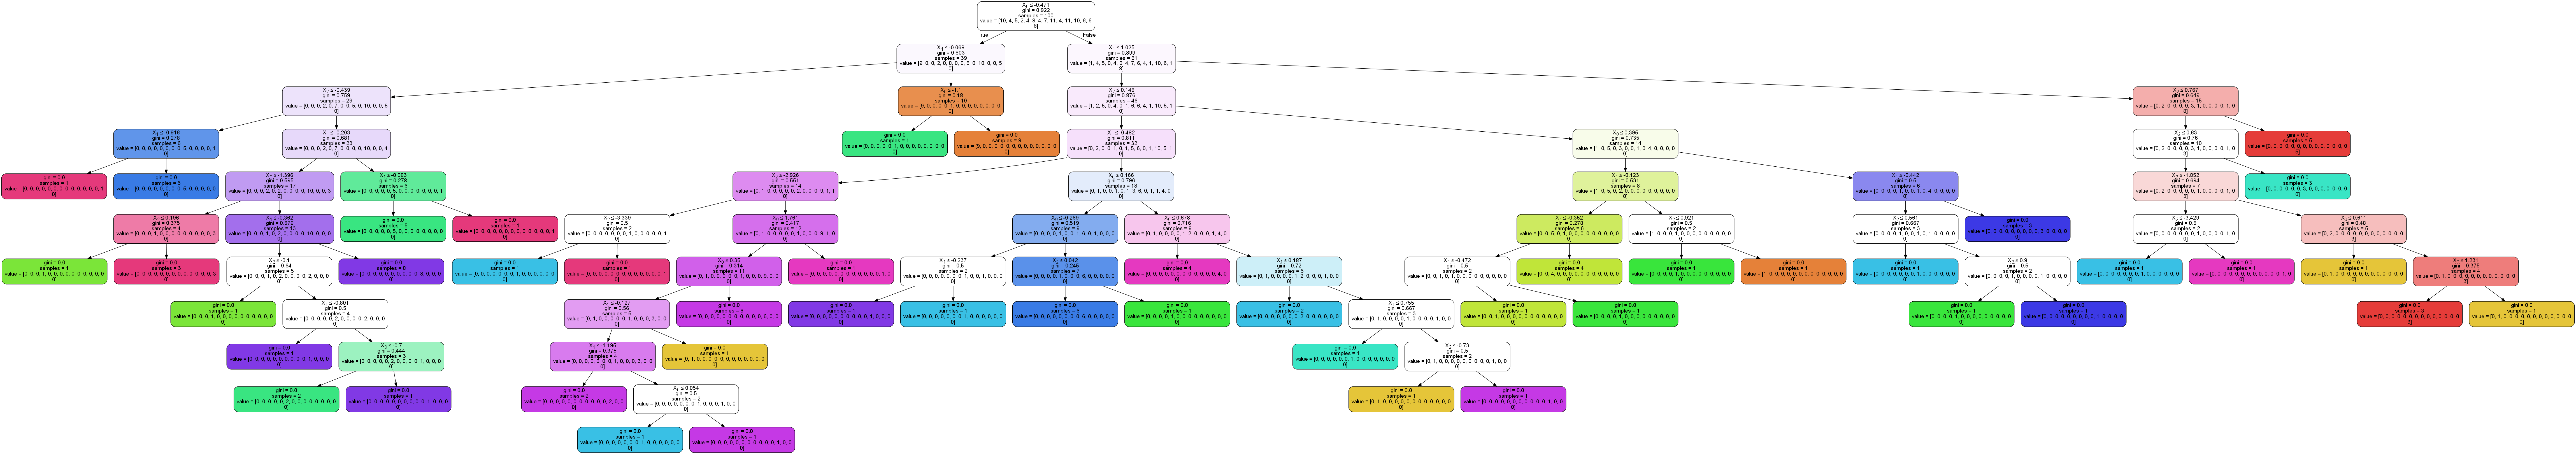

In [25]:
#decision tree - graphing (use new clf with less train and test data)
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
clf = tree.DecisionTreeClassifier()
clf.fit(X_train[:100],y_train[:100])
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [26]:
#XGBoost
from xgboost import XGBClassifier
t0 = time()
model = XGBClassifier()
model.fit(X_train[:2000], y_train[:2000])
print (model)
pred = model.predict(X_test[:500])
print ("time on training and prediction:", round(time()-t0, 3), "s")
print (scoring(pred, y_test[:500]))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
time on training and prediction: 0.658 s
Accuracy score is 72.20%


C:\Users\Maksym_Parats\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [29]:
#XGBoost-best params
import warnings
from sklearn.model_selection import RandomizedSearchCV
warnings.simplefilter('ignore', DeprecationWarning)
# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'n_estimators': range(8, 20),
    'max_depth': range(6, 10),
    'learning_rate': [.4, .45, .5, .55, .6],
    'colsample_bytree': [.6, .7, .8, .9, 1]
}

# Instantiate the regressor: gbm
gbm = XGBClassifier(n_estimators=10)

# Perform random search: grid_mse
xgb_random = RandomizedSearchCV(param_distributions=gbm_param_grid,
                                    estimator = gbm, scoring = "accuracy",
                                    verbose = 1, n_iter = 50, cv = 4)

# Fit randomized_mse to the data
xgb_random.fit(X_train[:10000], y_train[:10000])

# Print the best parameters and lowest RMSE
print("Best parameters found: ", xgb_random.best_params_)
print("Best accuracy found: ", xgb_random.best_score_)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  2.3min finished


Best parameters found:  {'n_estimators': 11, 'max_depth': 8, 'learning_rate': 0.4, 'colsample_bytree': 1}
Best accuracy found:  0.7668


In [30]:
#preparing data for KERAS modeling
data.head()

number     x     y     z  activity  label  x-scaled  y-scaled  z-scaled
0     0.0  1502  2215  2153         1      1 -4.360297 -1.669479  1.931520
1     1.0  1667  2072  2047         1      1 -2.878360 -3.096472  0.809722
2     2.0  1611  1957  1906         1      1 -3.381321 -4.244054 -0.682480
3     3.0  1601  1939  1831         1      1 -3.471135 -4.423675 -1.476205
4     4.0  1643  1965  1879         1      1 -3.093915 -4.164222 -0.968221

In [31]:
#create n-feature from x,y,z features as additional column
data['N-feature'] = ((data['x-scaled']**2 + data['y-scaled']**2 + data['z-scaled']**2) / 3)**0.5
data['N-feature'][:4]

0    2.917197
1    2.485206
2    3.157589
3    3.356430
Name: N-feature, dtype: float64

In [32]:
features = data['N-feature']
labels = data['label']
X_train_N, X_test_N, y_train_N, y_test_N = train_test_split(features, labels, test_size=0.33, random_state=42)

In [33]:
#KERAS

from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
#MLP for binary classification
t0 = time()
model = Sequential()
model.add(Dense(32, input_dim=1, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X_train_N[:200000], y_train_N[:200000],
          epochs=10,
          batch_size=128)
score = model.evaluate(X_test_N[:50000], y_test_N[:50000], batch_size=128)
print (score)
print ("time on training and scoring:", round(time()-t0, 3), "s")



Using TensorFlow backend.


Epoch 1/10
200000/200000 [==============================] - 2s 8us/step - loss: -109.8967 - acc: 0.0843
Epoch 2/10
200000/200000 [==============================] - 1s 7us/step - loss: -117.9481 - acc: 0.0843
Epoch 3/10
200000/200000 [==============================] - 1s 7us/step - loss: -117.9495 - acc: 0.0843
Epoch 4/10
200000/200000 [==============================] - 1s 7us/step - loss: -117.9498 - acc: 0.0843
Epoch 5/10
200000/200000 [==============================] - 1s 7us/step - loss: -117.9499 - acc: 0.0843
Epoch 6/10
200000/200000 [==============================] - 1s 7us/step - loss: -117.9505 - acc: 0.0843
Epoch 7/10
200000/200000 [==============================] - 1s 7us/step - loss: -117.9511 - acc: 0.0843
Epoch 8/10
200000/200000 [==============================] - 1s 7us/step - loss: -117.9513 - acc: 0.0843
Epoch 9/10
200000/200000 [==============================] - 1s 7us/step - loss: -117.9505 - acc: 0.0843
Epoch 10/10
50000/50000 [==============================] - 0s 3u

In [36]:
#Sequence classification with LSTM
max_features = 100
t0 = time()
model = Sequential()
model.add(Embedding(max_features, output_dim=256))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X_train_N[:20000], y_train_N[:20000], batch_size=16, epochs=10)
score = model.evaluate(X_test_N[:5000], y_test_N[:5000], batch_size=16)
print (score)
print ("time on training and scoring:", round(time()-t0, 3), "s")

Epoch 1/10
20000/20000 [==============================] - 5s 227us/step - loss: -114.4590 - acc: 0.0849
Epoch 2/10
20000/20000 [==============================] - 4s 183us/step - loss: -118.2563 - acc: 0.0849
Epoch 3/10
20000/20000 [==============================] - 4s 184us/step - loss: -118.2606 - acc: 0.0849
Epoch 4/10
20000/20000 [==============================] - 4s 183us/step - loss: -118.2650 - acc: 0.0849
Epoch 5/10
20000/20000 [==============================] - 4s 191us/step - loss: -118.2707 - acc: 0.0849
Epoch 6/10
20000/20000 [==============================] - 4s 185us/step - loss: -118.2753 - acc: 0.0849
Epoch 7/10
20000/20000 [==============================] - 4s 186us/step - loss: -118.2768 - acc: 0.0849
Epoch 8/10
20000/20000 [==============================] - 4s 189us/step - loss: -118.2790 - acc: 0.0849
Epoch 9/10
20000/20000 [==============================] - 4s 188us/step - loss: -118.2815 - acc: 0.0849
Epoch 10/10
5000/5000 [==============================] - 0s 63us

In [37]:
from keras.optimizers import SGD

t0 = time()
model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 1-dimensional vector.
model.add(Dense(64, activation='relu', input_dim=1))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(X_train_N[:200000], y_train_N[:200000],
          epochs=10,
          batch_size=128)
score = model.evaluate(X_test_N[:50000], y_test_N[:50000], batch_size=128)
print (score)
print ("time on training and scoring:", round(time()-t0, 3), "s")

Epoch 1/10
200000/200000 [==============================] - 2s 11us/step - loss: -117.9515 - acc: 0.0843
Epoch 2/10
200000/200000 [==============================] - 2s 11us/step - loss: -117.9515 - acc: 0.0843
Epoch 3/10
200000/200000 [==============================] - 2s 10us/step - loss: -117.9515 - acc: 0.0843
Epoch 4/10
200000/200000 [==============================] - 2s 10us/step - loss: -117.9515 - acc: 0.0843
Epoch 5/10
200000/200000 [==============================] - 2s 9us/step - loss: -117.9515 - acc: 0.0843
Epoch 6/10
200000/200000 [==============================] - 2s 10us/step - loss: -117.9515 - acc: 0.0843
Epoch 7/10
200000/200000 [==============================] - 2s 9us/step - loss: -117.9515 - acc: 0.0843
Epoch 8/10
200000/200000 [==============================] - 2s 9us/step - loss: -117.9515 - acc: 0.0843
Epoch 9/10
200000/200000 [==============================] - 2s 9us/step - loss: -117.9515 - acc: 0.0843
Epoch 10/10
50000/50000 [==============================] - 

As we can see the best result on raw data gives us XGBoost: Best accuracy found:  0.7668. But we can evaluate our models on some particular activity in order to remove both of bias and variance factors. Let's take into consideratin activity 7: Talking while Standing

In [38]:
data.head()

number     x     y     z  activity  label  x-scaled  y-scaled  z-scaled  \
0     0.0  1502  2215  2153         1      1 -4.360297 -1.669479  1.931520   
1     1.0  1667  2072  2047         1      1 -2.878360 -3.096472  0.809722   
2     2.0  1611  1957  1906         1      1 -3.381321 -4.244054 -0.682480   
3     3.0  1601  1939  1831         1      1 -3.471135 -4.423675 -1.476205   
4     4.0  1643  1965  1879         1      1 -3.093915 -4.164222 -0.968221   

   N-feature  
0   2.917197  
1   2.485206  
2   3.157589  
3   3.356430  
4   3.046884

In [40]:
# Create frame for activity #7 and groupping it by testees
df = data[['x-scaled','y-scaled','z-scaled','activity', 'label']]
data_act_1 = df[df['activity'] == 7]
data_group = data_act_1.groupby('label').size()
print (data_group)

label
1     83748
2     22231
3     17151
4     14901
5     17249
6     15500
7     17500
8     33431
9     20940
10    35490
11    77600
12    36711
13    83701
14    33750
15    83660
dtype: int64


In [41]:
#feature cross-validation
features = data_act_1[['x-scaled','y-scaled','z-scaled']]
labels = data_act_1['label']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [42]:
#NAIVE
t0 = time()
clf = GaussianNB()
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)
print ("time on training and prediction:", round(time()-t0, 3), "s")  
print (scoring(prediction, y_test))

time on training and prediction: 0.255 s
Accuracy score is 90.00%


In [43]:
#SVM
t0 = time()
clf = SVC()
clf.fit(X_train[:30000],y_train[:30000])
prediction = clf.predict(X_test[:10000])
print ("time on training and prediction:", round(time()-t0, 3), "s")  
print (scoring(prediction, y_test[:10000]))

time on training and prediction: 3.383 s
Accuracy score is 92.92%


In [44]:
#Dtree
t0 = time()
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)
print (scoring(prediction, y_test))
print ("time on training and prediction:", round(time()-t0, 3), "s")  

Accuracy score is 90.01%
time on training and prediction: 1.272 s


In [47]:
#XGBoost
from xgboost import XGBClassifier
t0 = time()
model = XGBClassifier()
model.fit(X_train[:20000], y_train[:20000])
print (model)
pred = model.predict(X_test[:5000])
print ("time on training and prediction:", round(time()-t0, 3), "s")
print (scoring(pred, y_test[:5000]))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
time on training and prediction: 5.089 s
Accuracy score is 93.10%


In [48]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
t0 = time()
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)
print (scoring(prediction, y_test))
print ("time on training and prediction:", round(time()-t0, 3), "s")

Accuracy score is 93.04%
time on training and prediction: 2.321 s


In [49]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
t0 = time()
clf = RandomForestClassifier(max_depth=14, random_state=10)
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)
print (scoring(prediction, y_test))
print ("time on training and prediction:", round(time()-t0, 3), "s")  

Accuracy score is 93.27%
time on training and prediction: 3.474 s


In [50]:
# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
t0 = time()
clf = AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=5, learning_rate=1.0, algorithm='SAMME.R', random_state=None)
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)
print (scoring(prediction, y_test))
print ("time on training and prediction:", round(time()-t0, 3), "s")  

Accuracy score is 92.97%
time on training and prediction: 33.452 s


In [51]:
#KERAS
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.decomposition import RandomizedPCA
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=3))
model.add(Dense(1, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=64)
print (model.summary())
score = model.evaluate(X_test, y_test, batch_size=64)
print(score)

Epoch 1/5
415494/415494 [==============================] - 4s 9us/step - loss: 90.5005 - acc: 0.1411
Epoch 2/5
415494/415494 [==============================] - 3s 8us/step - loss: 90.5005 - acc: 0.1411
Epoch 3/5
415494/415494 [==============================] - 3s 8us/step - loss: 90.5005 - acc: 0.1411
Epoch 4/5
415494/415494 [==============================] - 3s 8us/step - loss: 90.5005 - acc: 0.1411
Epoch 5/5
415494/415494 [==============================] - 3s 8us/step - loss: 90.5005 - acc: 0.1411
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                128       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 33        
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
None
178069/178069 [===============

As we can see filtered data per activity (number 7) provides us more evaluated and precisious results. RandomForest has Accuracy score 93.27%. So if we grab the data per activity number 7 only it is possible to forecast and define the testee with accuracy approximately 93%.

Further analisys can be observed in glance of creating common data table with transformed data structured per the same frequencies of activity.